In [2]:
from figure_utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SAVE = False
runtime_df = pd.read_parquet(f"{RESULT_DIR}/daic/preprocessed.parquet")
gpu_mapping = {'2080': '2080Ti', '1080': '1080Ti', 'a40': 'A40', 'p100': 'P100', 'v100': 'V100'}
runtime_df = runtime_df[(runtime_df.dataset_type == 'synthetic') & (~runtime_df.operator.isin(['Noop', 'Materialization']))]

runtime_df.compute_unit = runtime_df.compute_unit.astype(str).apply(lambda x: gpu_mapping.get(x, x))
runtime_df['compute_unit'].unique()

array(['CPU 08c', 'CPU 32c', 'CPU 16c', '1080Ti', 'V100', 'P100', 'A40',
       '2080Ti'], dtype=object)

In [3]:
runtime_df = runtime_df.drop(columns=['features', 'num_cores', 'source_file','parallelism', 'mem_mat_read',
       'mem_mat_write', 'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat',
       'comp_lmm_mat', 'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac',
       'comp_rmm_fac', 'comp_mat_col_major', 'comp_fac_col_major',
       'comp_scalar_dense', '13', '14', 'comp_matrix_dense',
       'mem_read_scalar_dense', 'mem_write_scalar_dense',
       'mem_read_matrix_dense', 'mem_write_matrix_dense', 'mem_read_rowsum',
       'mem_write_rowsum', 'mem_read_colsum', 'mem_write_colsum', '24', '25',
       'comp_rowsum', 'comp_colsum','comp_mat', 'comp_fac','comp_ratio',])
runtime_df

,dataset,speedup,operator,selectivity,cardinality_T,cardinality_S,join,compute_unit,complexity_ratio,times_mean,...,nnz_S,r_T,c_T,sparsity_T,sparsity_S,morpheusfi_p,morpheusfi_q,morpheusfi_eis,morpheusfi_ns,morpheusfi_nis
8,n_R=1-r_T=500000-c_T=10-rho_c_S=0.1-rho_c_R=0....,35.682223,Left multiply,1.005264,500000,502632,preset,CPU 08c,9.547670,0.000414,...,"[500000, 26320]",500000,11,0.000000,"[0.0, 0.0]",2,0,[0.0],500000,[2632]
9,n_R=1-r_T=500000-c_T=10-rho_c_S=0.1-rho_c_R=0....,16.784362,Left multiply,1.005264,500000,502632,preset,CPU 32c,9.547670,0.000505,...,"[500000, 26320]",500000,11,0.000000,"[0.0, 0.0]",2,0,[0.0],500000,[2632]
10,n_R=1-r_T=500000-c_T=10-rho_c_S=0.1-rho_c_R=0....,9.881361,Left multiply,1.005264,500000,502632,preset,CPU 16c,9.547670,0.000435,...,"[500000, 26320]",500000,11,0.000000,"[0.0, 0.0]",2,0,[0.0],500000,[2632]
11,n_R=1-r_T=500000-c_T=10-rho_c_S=0.1-rho_c_R=0....,0.242405,Left multiply,1.005264,500000,502632,preset,1080Ti,9.547670,0.000685,...,"[500000, 26320]",500000,11,0.000000,"[0.0, 0.0]",2,0,[0.0],500000,[2632]
12,n_R=1-r_T=500000-c_T=10-rho_c_S=0.1-rho_c_R=0....,0.211488,Left multiply,1.005264,500000,502632,preset,V100,9.547670,0.000403,...,"[500000, 26320]",500000,11,0.000000,"[0.0, 0.0]",2,0,[0.0],500000,[2632]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337561,n_R=1-r_T=500000-c_T=50-rho_c_S=0.1-rho_c_R=0....,0.282157,Logistic Regression,1.000000,398333,398333,preset,2080Ti,0.950176,0.563241,...,"[1750000, 2416650]",398333,55,0.820845,"[0.0, 0.0]",2,0,[0.0],398333,[48333]
337562,n_R=1-r_T=500000-c_T=50-rho_c_S=0.1-rho_c_R=0....,0.280468,Logistic Regression,1.000000,398333,398333,preset,A40,0.950176,0.664214,...,"[1750000, 2416650]",398333,55,0.820845,"[0.0, 0.0]",2,0,[0.0],398333,[48333]
337563,n_R=1-r_T=500000-c_T=50-rho_c_S=0.1-rho_c_R=0....,0.280419,Logistic Regression,1.000000,398333,398333,preset,V100,0.950176,0.634237,...,"[1750000, 2416650]",398333,55,0.820845,"[0.0, 0.0]",2,0,[0.0],398333,[48333]
337564,n_R=1-r_T=500000-c_T=50-rho_c_S=0.1-rho_c_R=0....,0.282882,Logistic Regression,1.000000,398333,398333,preset,P100,0.950176,1.187695,...,"[1750000, 2416650]",398333,55,0.820845,"[0.0, 0.0]",2,0,[0.0],398333,[48333]


In [4]:
runtime_df.columns

Index(['dataset', 'speedup', 'operator', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'compute_unit', 'complexity_ratio',
       'times_mean', 'dataset_type', 'compute_type', 'label', 'tr', 'fr',
       'r_S', 'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'sparsity_T', 'sparsity_S', 'morpheusfi_p', 'morpheusfi_q',
       'morpheusfi_eis', 'morpheusfi_ns', 'morpheusfi_nis'],
      dtype='object')

In [49]:
runtime_df[['r_S', 'c_S', 'nnz_S']]

,r_S,c_S,nnz_S
8,"[500000, 2632]","[1, 10]","[500000, 26320]"
9,"[500000, 2632]","[1, 10]","[500000, 26320]"
10,"[500000, 2632]","[1, 10]","[500000, 26320]"
11,"[500000, 2632]","[1, 10]","[500000, 26320]"
12,"[500000, 2632]","[1, 10]","[500000, 26320]"
...,...,...,...
337561,"[350000, 48333]","[5, 50]","[1750000, 2416650]"
337562,"[350000, 48333]","[5, 50]","[1750000, 2416650]"
337563,"[350000, 48333]","[5, 50]","[1750000, 2416650]"
337564,"[350000, 48333]","[5, 50]","[1750000, 2416650]"


<Axes: ylabel='Density'>

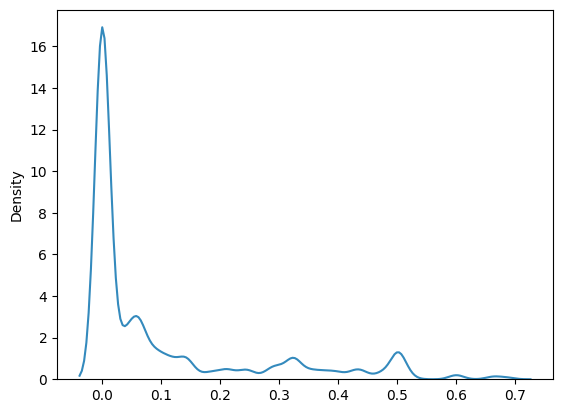

In [55]:
sns.kdeplot( 1 - (runtime_df.nnz_S.apply(sum) / (runtime_df.r_S * runtime_df.c_S).apply(sum)))

## Data & Model Characteristics

Ideas
 - Complexity ratio vs performance ratio, broken down by X

<Axes: xlabel='complexity_ratio', ylabel='speedup'>

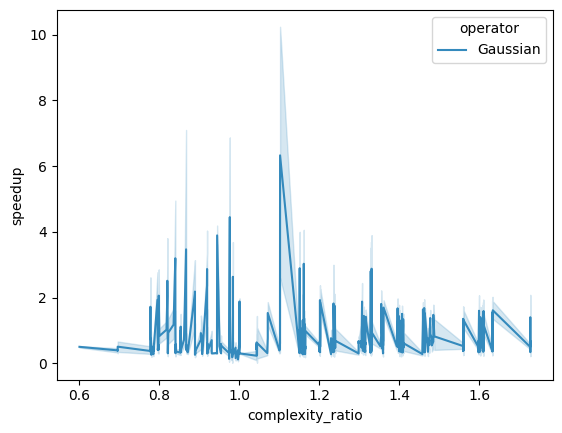

In [3]:
# sns.catplot(data=runtime_df[runtime_df.operator.isin(MODEL_OPERATORS)][:1000], x='comp_ratio', y='speedup', kind='point', col='operator')
sns.lineplot(data=runtime_df[runtime_df.operator =='Gaussian'][:10000], x='complexity_ratio', y='speedup', hue='operator')


In [164]:
def round_partial (value, resolution):
    return round(round(value / resolution) * resolution, 2)

runtime_df['complexity_rounded'] = runtime_df.complexity_ratio.apply(lambda x: round_partial(x, 0.5))
runtime_df['TR_rounded'] = runtime_df.TR.apply(lambda x: round_partial(x, 2))
runtime_df['FR_rounded'] = runtime_df.FR.apply(lambda x: round_partial(x, 2))
runtime_df['speedup_rounded'] = runtime_df.speedup.apply(lambda x: round(x,1))
runtime_df['nnz_ratio'] = runtime_df.nnz_S_sum / runtime_df.nnz_T
runtime_df['nnz_ratio_rounded'] = runtime_df.nnz_ratio.apply(lambda x: round_partial(x, 0.15))
runtime_df['sparsity_S'] = 1 - (runtime_df.nnz_S.apply(sum) / (runtime_df.r_S * runtime_df.c_S).apply(sum))
runtime_df['sparsity_S_rounded'] = 1 - runtime_df.sparsity_S.apply(lambda x: round_partial(x, 0.1))

runtime_df['sparsity_T_rounded'] = runtime_df.sparsity_T.apply(lambda x: round_partial(x, 0.1))
runtime_df['sparsity_ratio'] = (runtime_df.sparsity_S / runtime_df.sparsity_T)
runtime_df['sparsity_ratio_rounded'] = runtime_df.sparsity_ratio.fillna(1.0).apply(lambda x: round_partial(x, 0.5))
runtime_df['nnz_inverse'] = (1/runtime_df.nnz_ratio).apply(lambda x: round_partial(x, 0.5))


In [147]:
(runtime_df.sparsity_S / runtime_df.sparsity_T).agg(['min', 'max', 'mean'])

min      0.000000
max     10.450314
mean     1.429918
dtype: float64

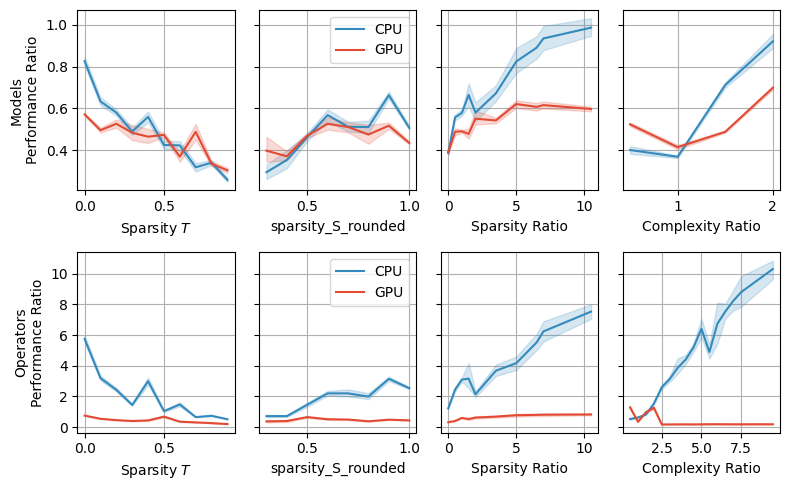

In [166]:
fig,axs = plt.subplots(2, 3, figsize=(FIGURE_WIDTH_INCHES,5), sharey='row')
for i, row in enumerate(axs):
    if i == 0:
        df = runtime_df[runtime_df.operator.isin(MODEL_OPERATORS)]
    else:
        df = runtime_df[~runtime_df.operator.isin(MODEL_OPERATORS)]
    for j, (ax, x_var, x_label) in enumerate(zip(
            row, 
            ['sparsity_T_rounded' , 'sparsity_ratio_rounded', 'complexity_rounded'],
            ['Sparsity $T$',  'Sparsity Ratio', 'Complexity Ratio']
        )):
        sns.lineplot(df, x=x_var, y='speedup', 
                hue='compute_type', 
                ax=ax, errorbar=('ci', 99))
        ax.set_xlabel(x_label)  # Capitalize the x axis labels
        if j == 1:  # Only show the legend in the middle figure
            handles, labels = ax.get_legend_handles_labels()
            labels = [label.upper() for label in labels]  # Capitalize the legend labels
            ax.legend(handles, labels)
        else:
            ax.get_legend().remove()
            
        ax.grid()
        ax.set_axisbelow(True)
        ax.set_ylabel(f'{["Models", "Operators"][i]}\nPerformance Ratio')  # Set 'Performance Ratio' as the y axis label
# ax.set_yscale('log')
fig.tight_layout()
if SAVE or True:
    

In [6]:


def plot_vs_speedup(plot_func, df, x='complexity_rounded', y='speedup', rows=4, cols=4, round_x=True, **kwargs):
    df= df.copy()
    if round_x:
        round_resolution  = round((df[x].max() - df[x].min()) / 10, 1)
        print(round_resolution)
        df[x] = df[x].apply(lambda x: round_partial(x, round_resolution))
    fig, axes = plt.subplots(rows, cols, figsize=(FIGURE_WIDTH_INCHES * 0.5 * cols, 3*rows))

    for ax, (group, sub_df) in zip(axes.flatten(), df.groupby(["operator"])):
        plot_func(data=sub_df, x=x, y=y, ax=ax, **kwargs)
        ax.set_title(f'group: {group}')

    fig.tight_layout()
    return fig

0.1


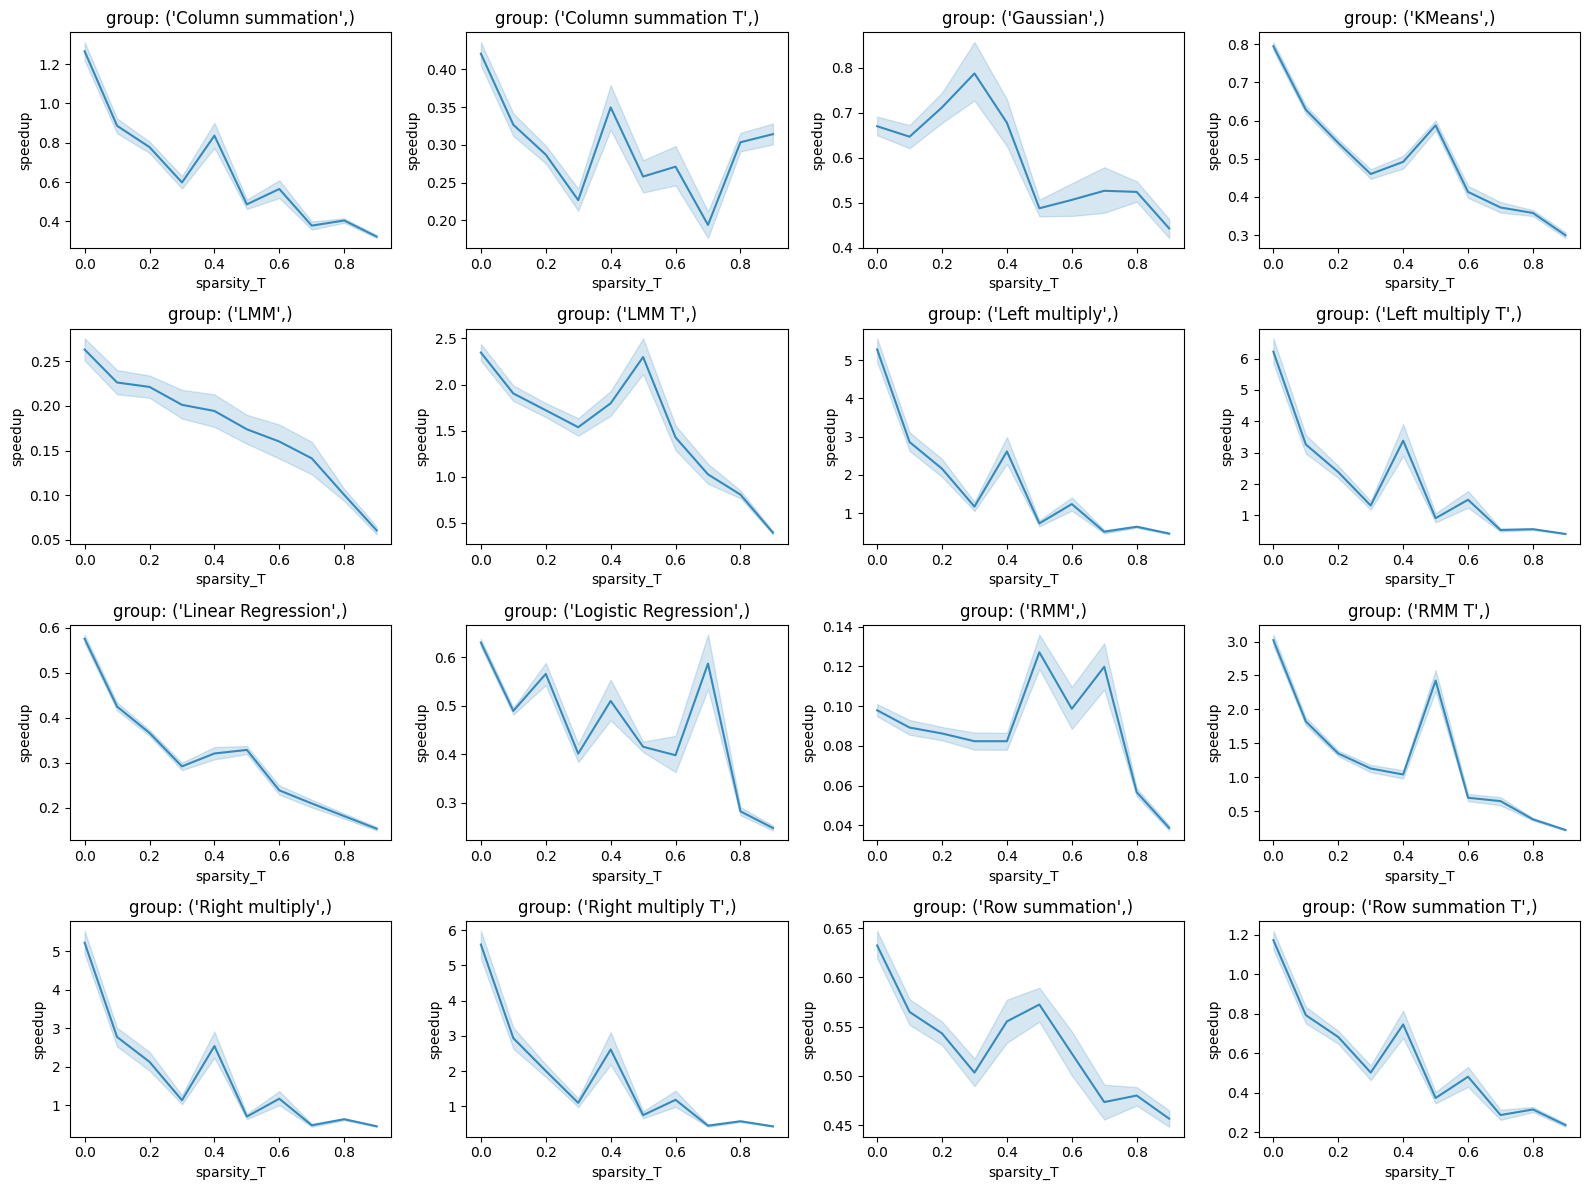

In [8]:
f = plot_vs_speedup( sns.lineplot, runtime_df, "sparsity_T", hue=None, round_x=True)


0.1


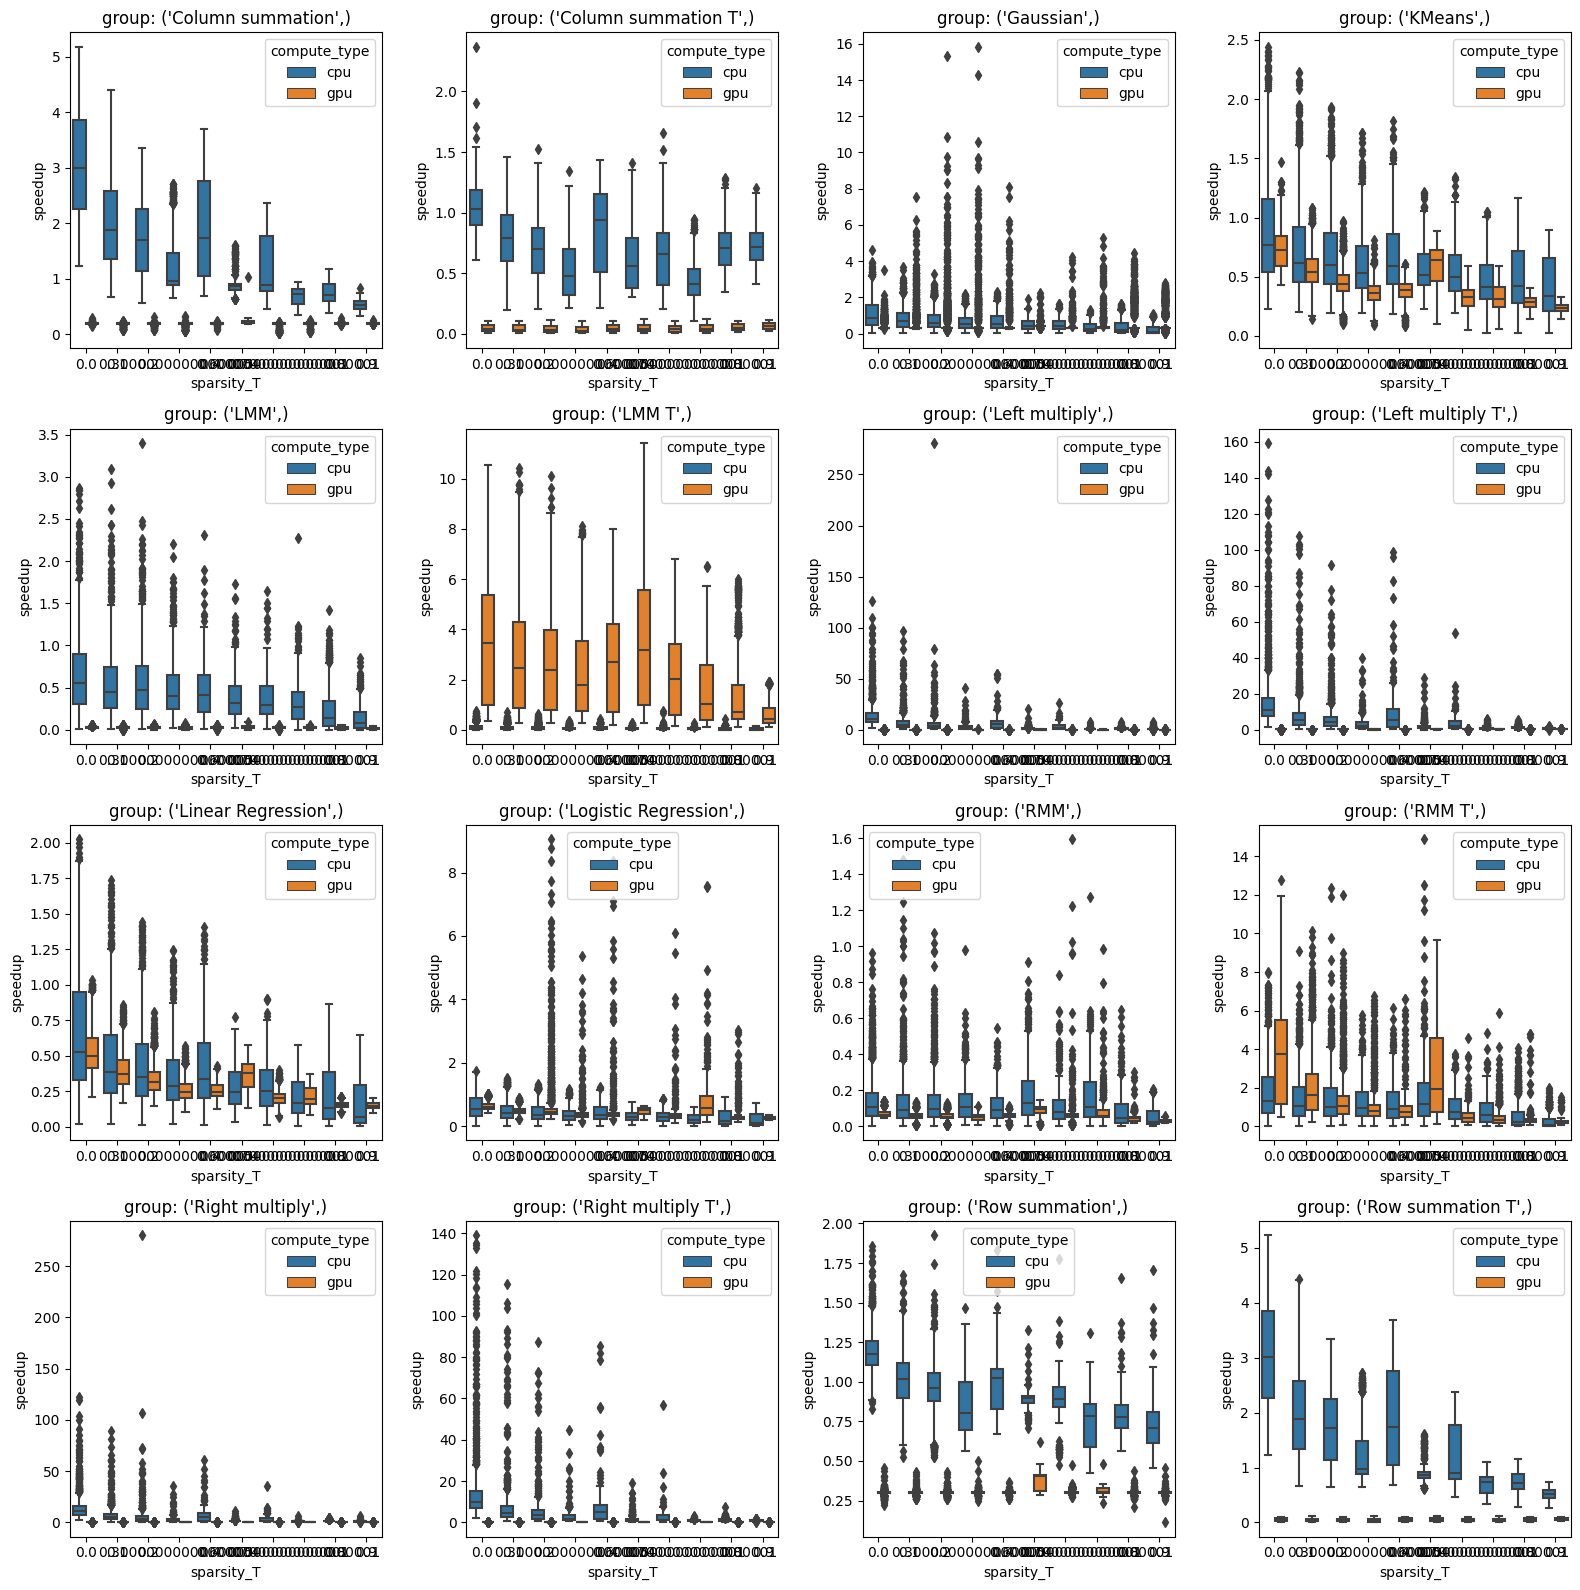

In [7]:
f = plot_vs_speedup( sns.boxplot, runtime_df, "sparsity_T", hue='compute_type', round_x=True)
# something else with sparsity T vs sparsity S (NNZ?)

0.2


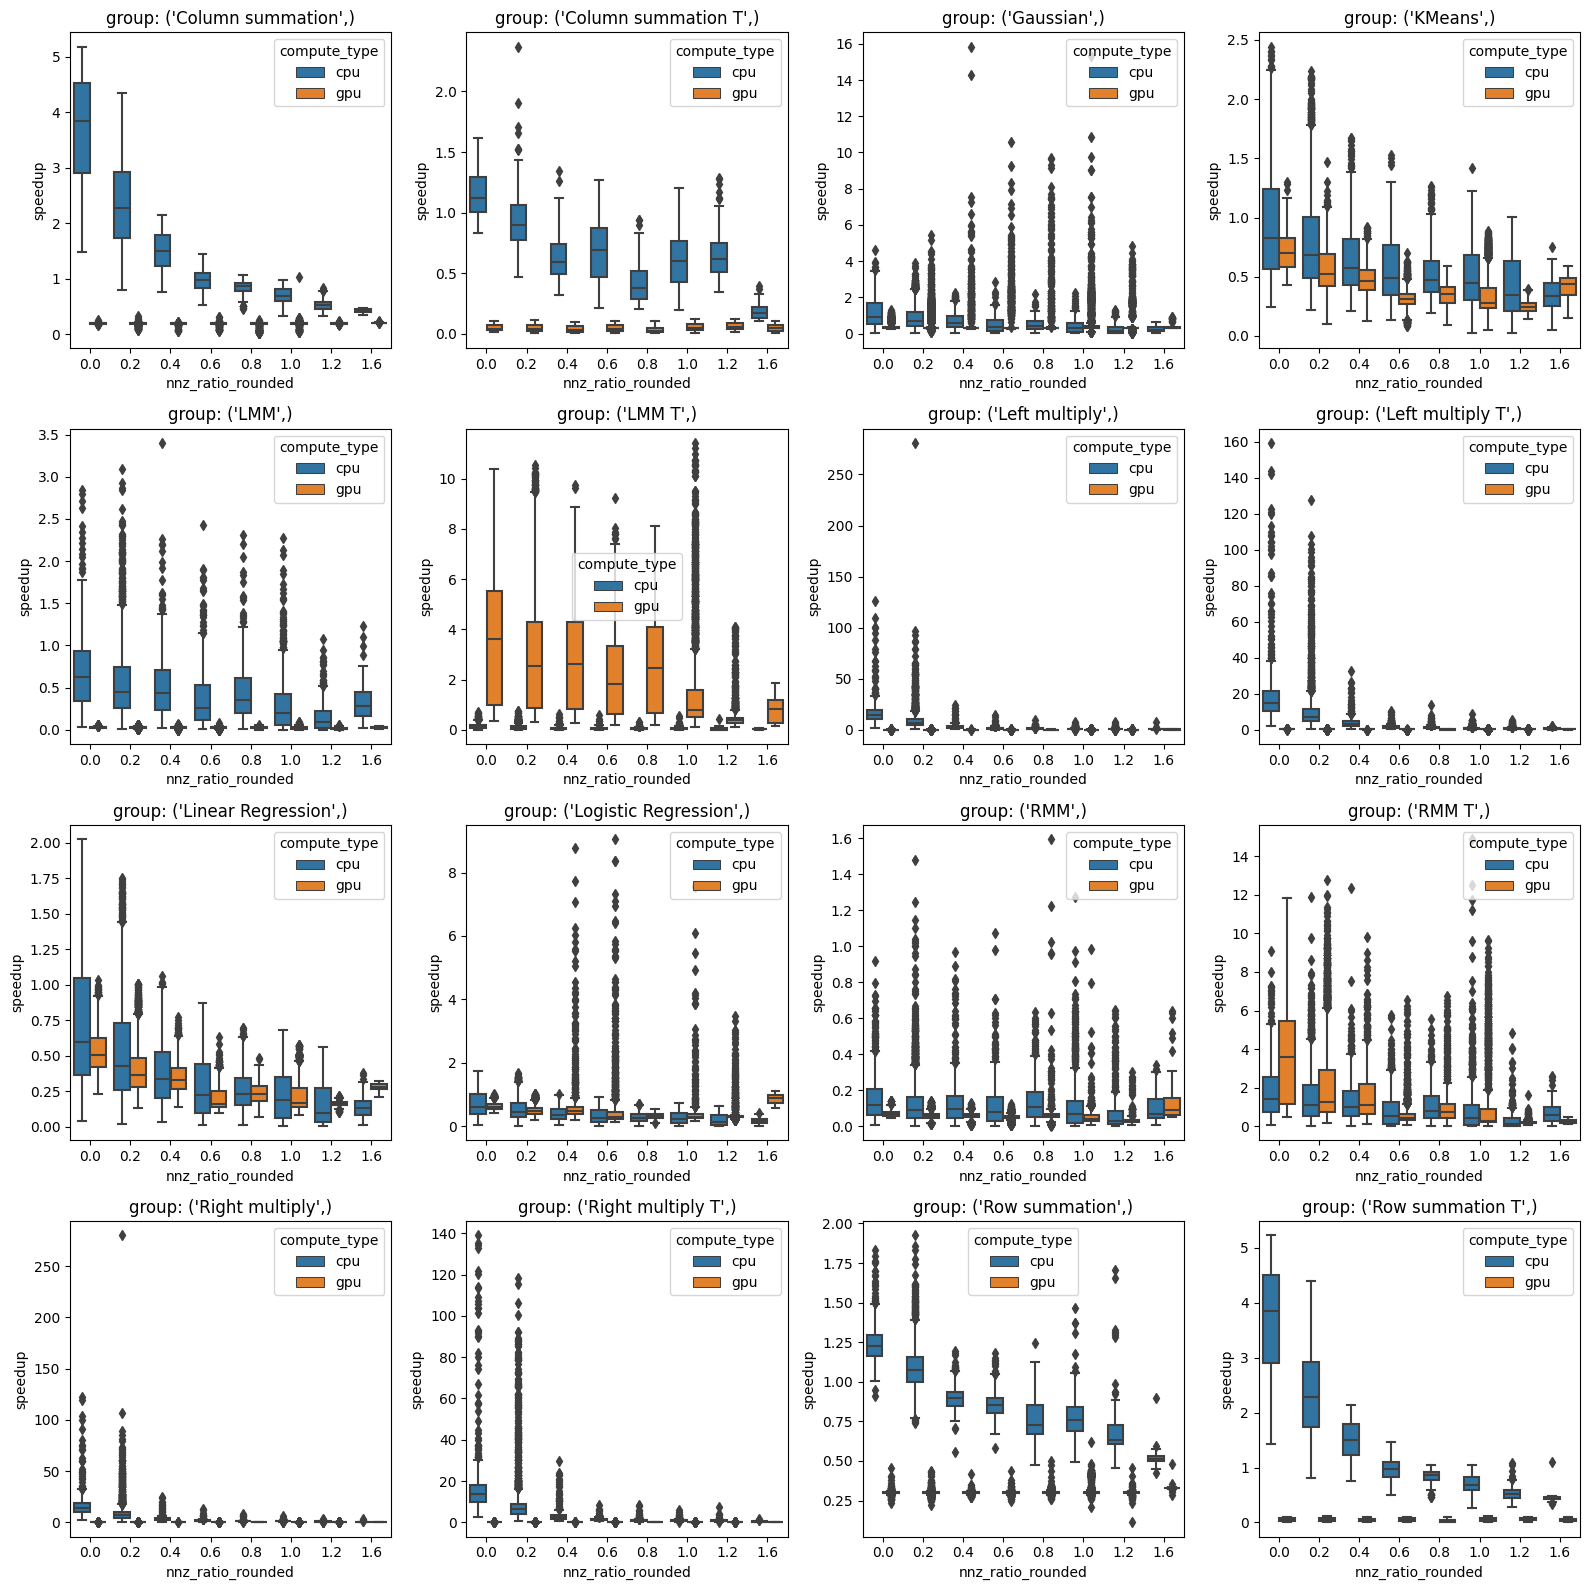

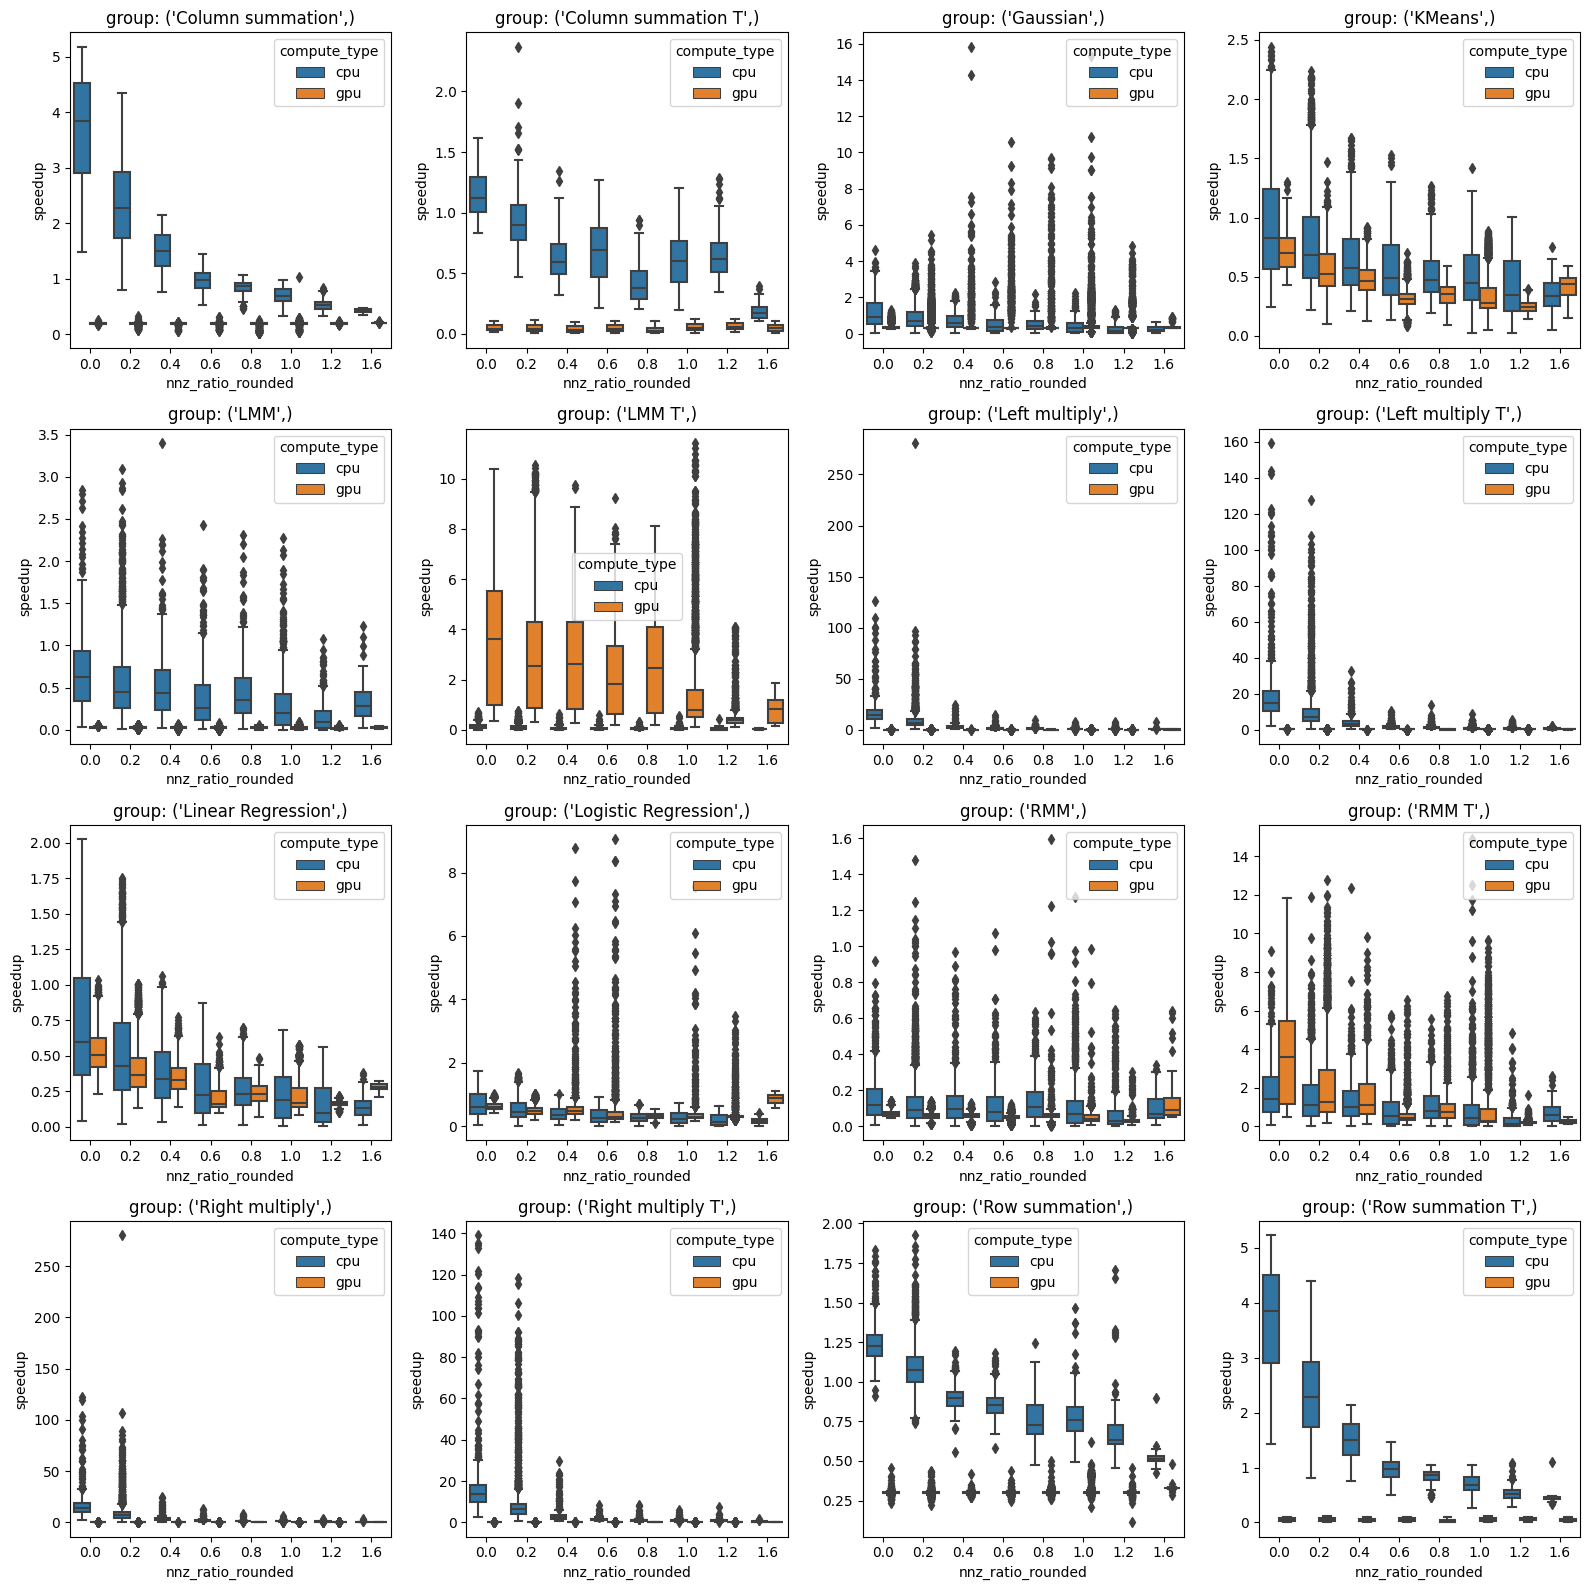

In [31]:
plot_vs_speedup( sns.boxplot, runtime_df, "nnz_ratio_rounded", hue='compute_type', round_x=True)

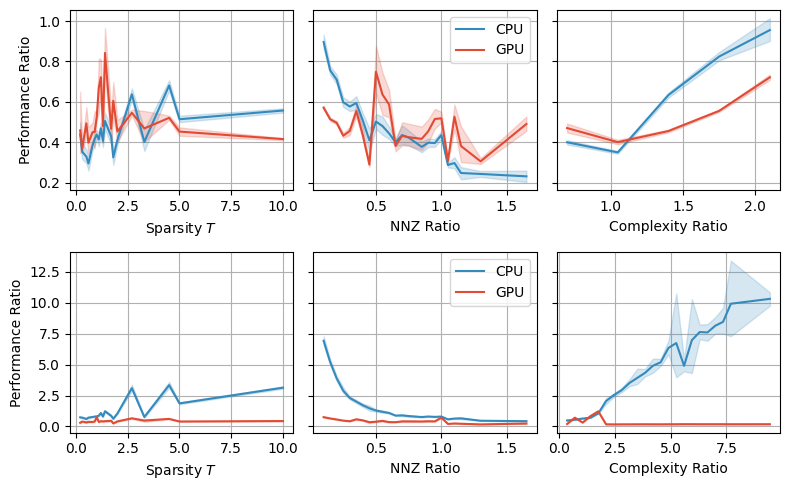

<Axes: xlabel='nnz_ratio_rounded', ylabel='speedup'>

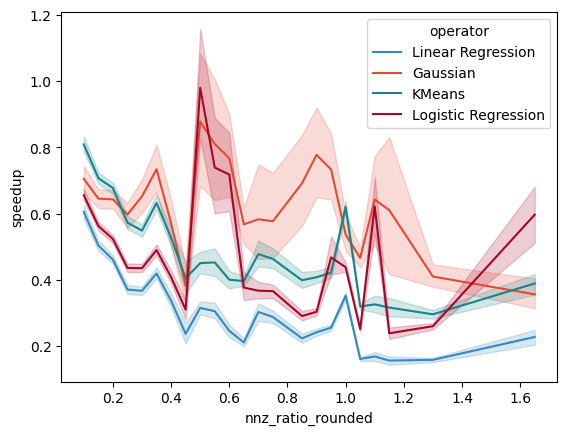

In [46]:
fig,ax = plt.subplots()
sns.lineplot(runtime_df[runtime_df.operator.isin(MODEL_OPERATORS)], x='nnz_ratio_rounded', y='speedup', 
            #  hue='compute_type', 
            hue='operator',
             ax=ax, errorbar=('ci', 99))
# ax.set_yscale('log')

In [ ]:
numerical_columns = runtime_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['speedup', 'selectivity', 'cardinality_T', 'cardinality_S',
       'complexity_ratio', 'times_mean', 'tr', 'fr', 'TR', 'FR', 'nnz_T',
       'nnz_S_sum', 'r_T', 'c_T', 'sparsity_T', 'morpheusfi_p', 'morpheusfi_q',
       'morpheusfi_ns', 'complexity_rounded', 'TR_rounded', 'FR_rounded',
       'speedup_rounded', 'nnz_ratio'],
      dtype='object')


/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/matrix.p

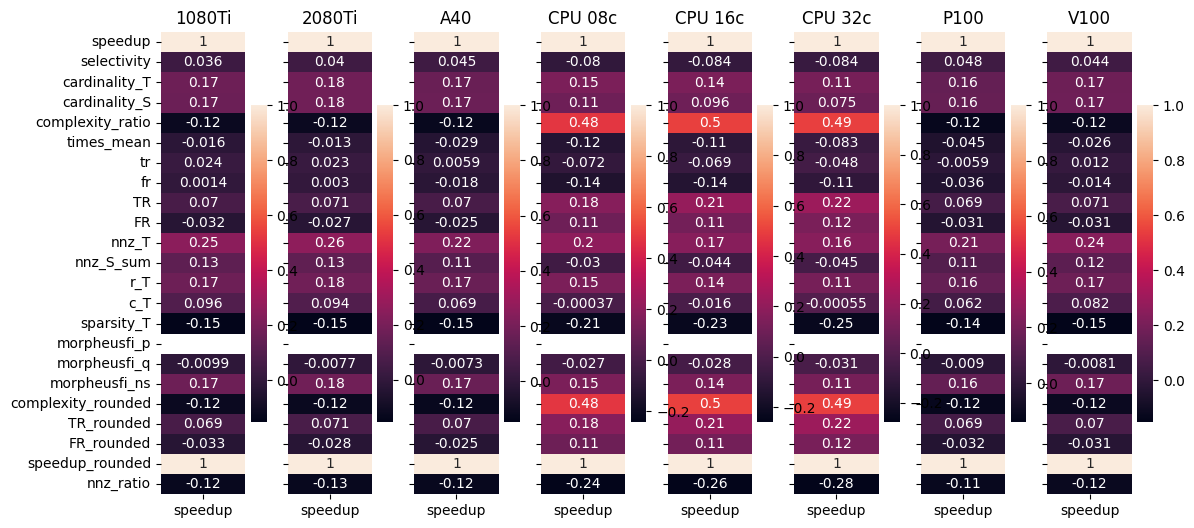

In [ ]:
fig, axs = plt.subplots(1, len(runtime_df.compute_unit.unique()), figsize=(FIGURE_WIDTH_INCHES * 0.2 * len(runtime_df.compute_unit.unique()), 6), sharey=True)
for ax, (group, df) in zip(axs.flatten(), runtime_df.groupby('compute_unit')):
   sns.heatmap(df[numerical_columns].corr()[['speedup']], annot=True, ax=ax)
   ax.set_title(group)

In [ ]:
for variable in [x for x in numerical_columns if x not in ['speedup', 'morpheusfi_p']]:
    print(variable)
    fig = plot_vs_speedup( sns.boxplot, runtime_df, variable, hue='compute_type', round_x=True)
    fig.suptitle(f'Boxplot of {variable} vs speedup')

/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

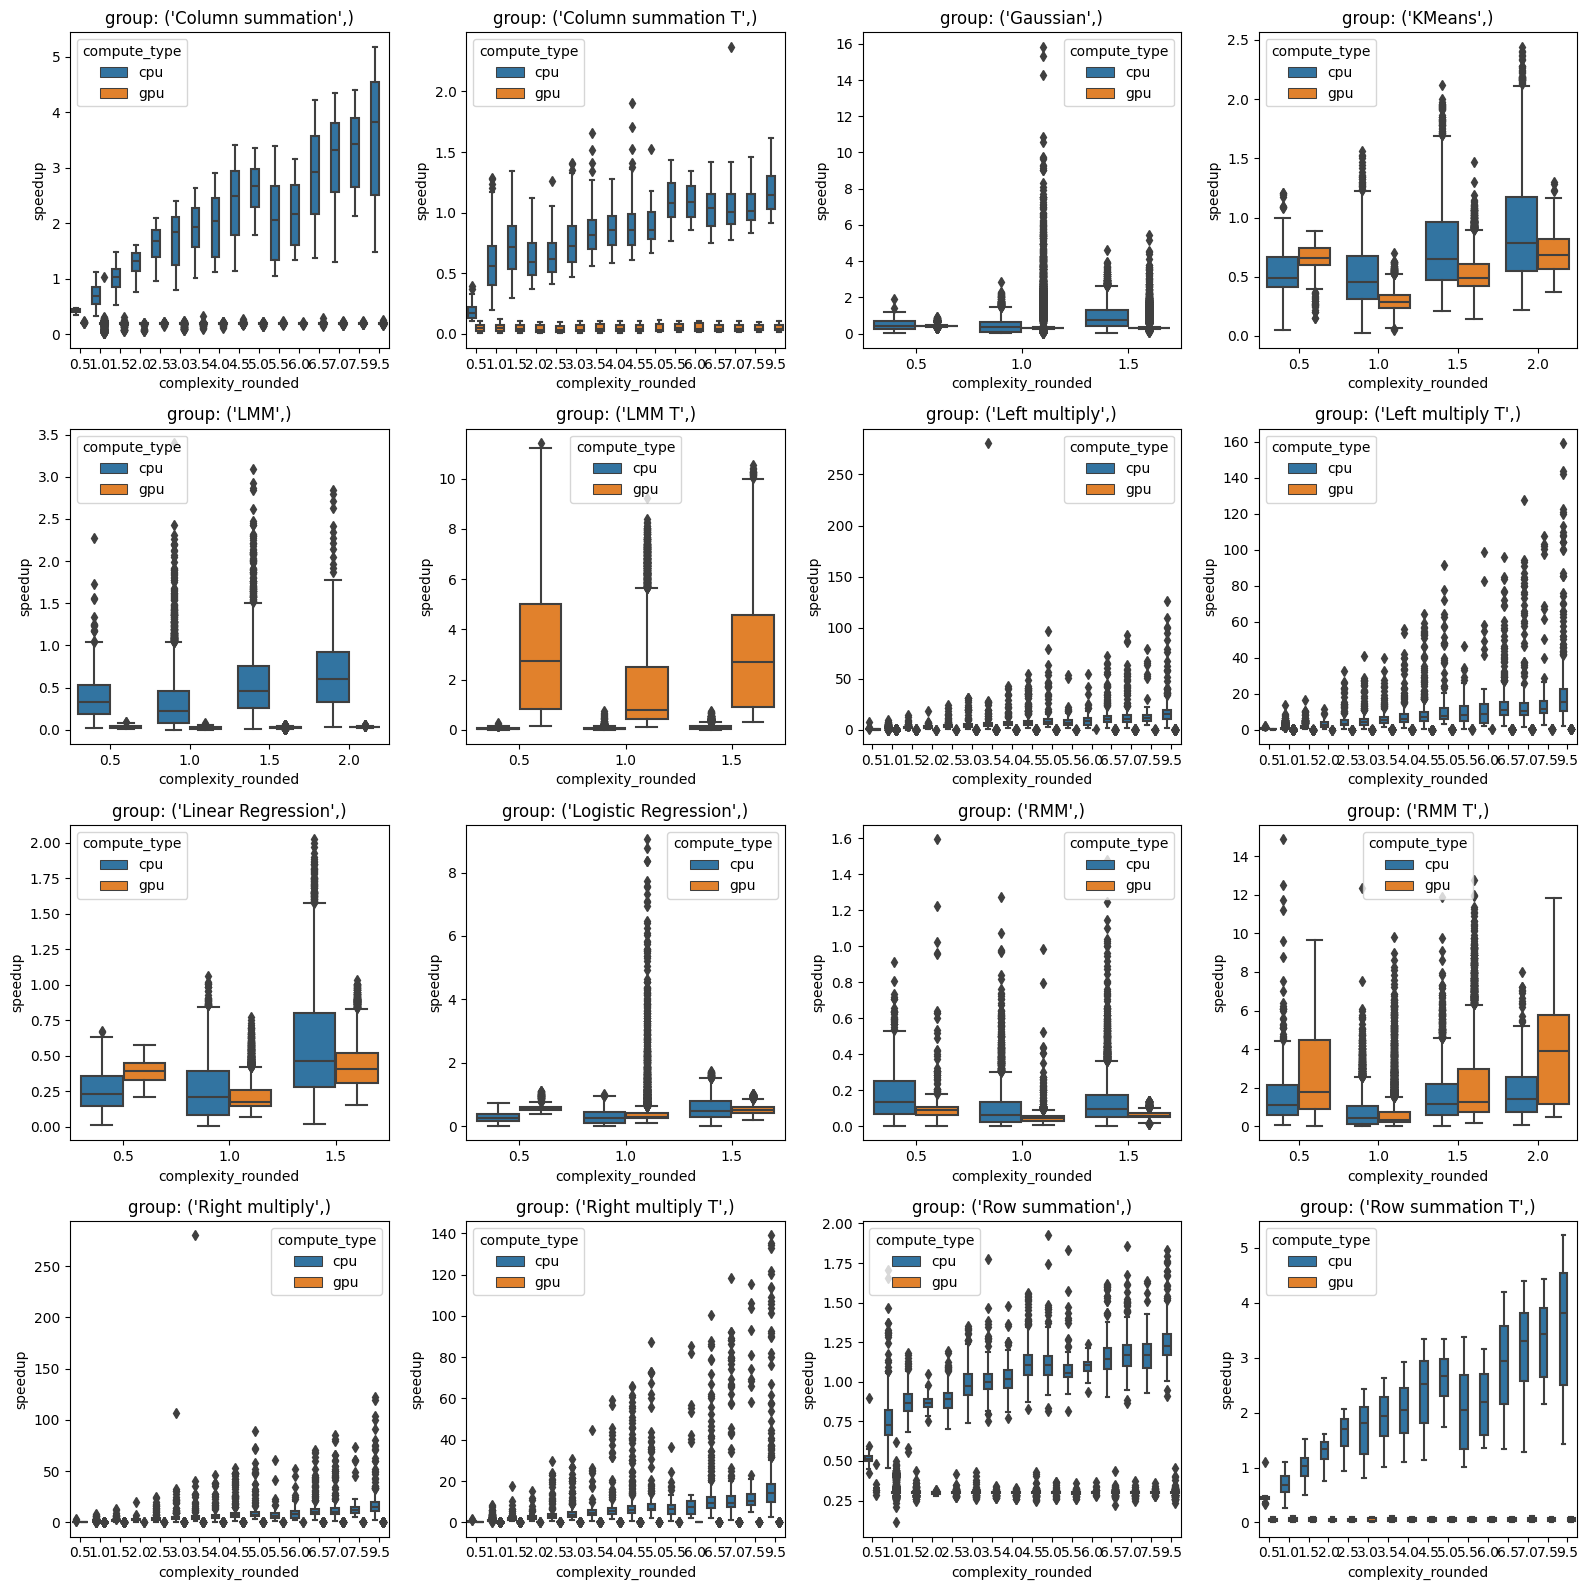

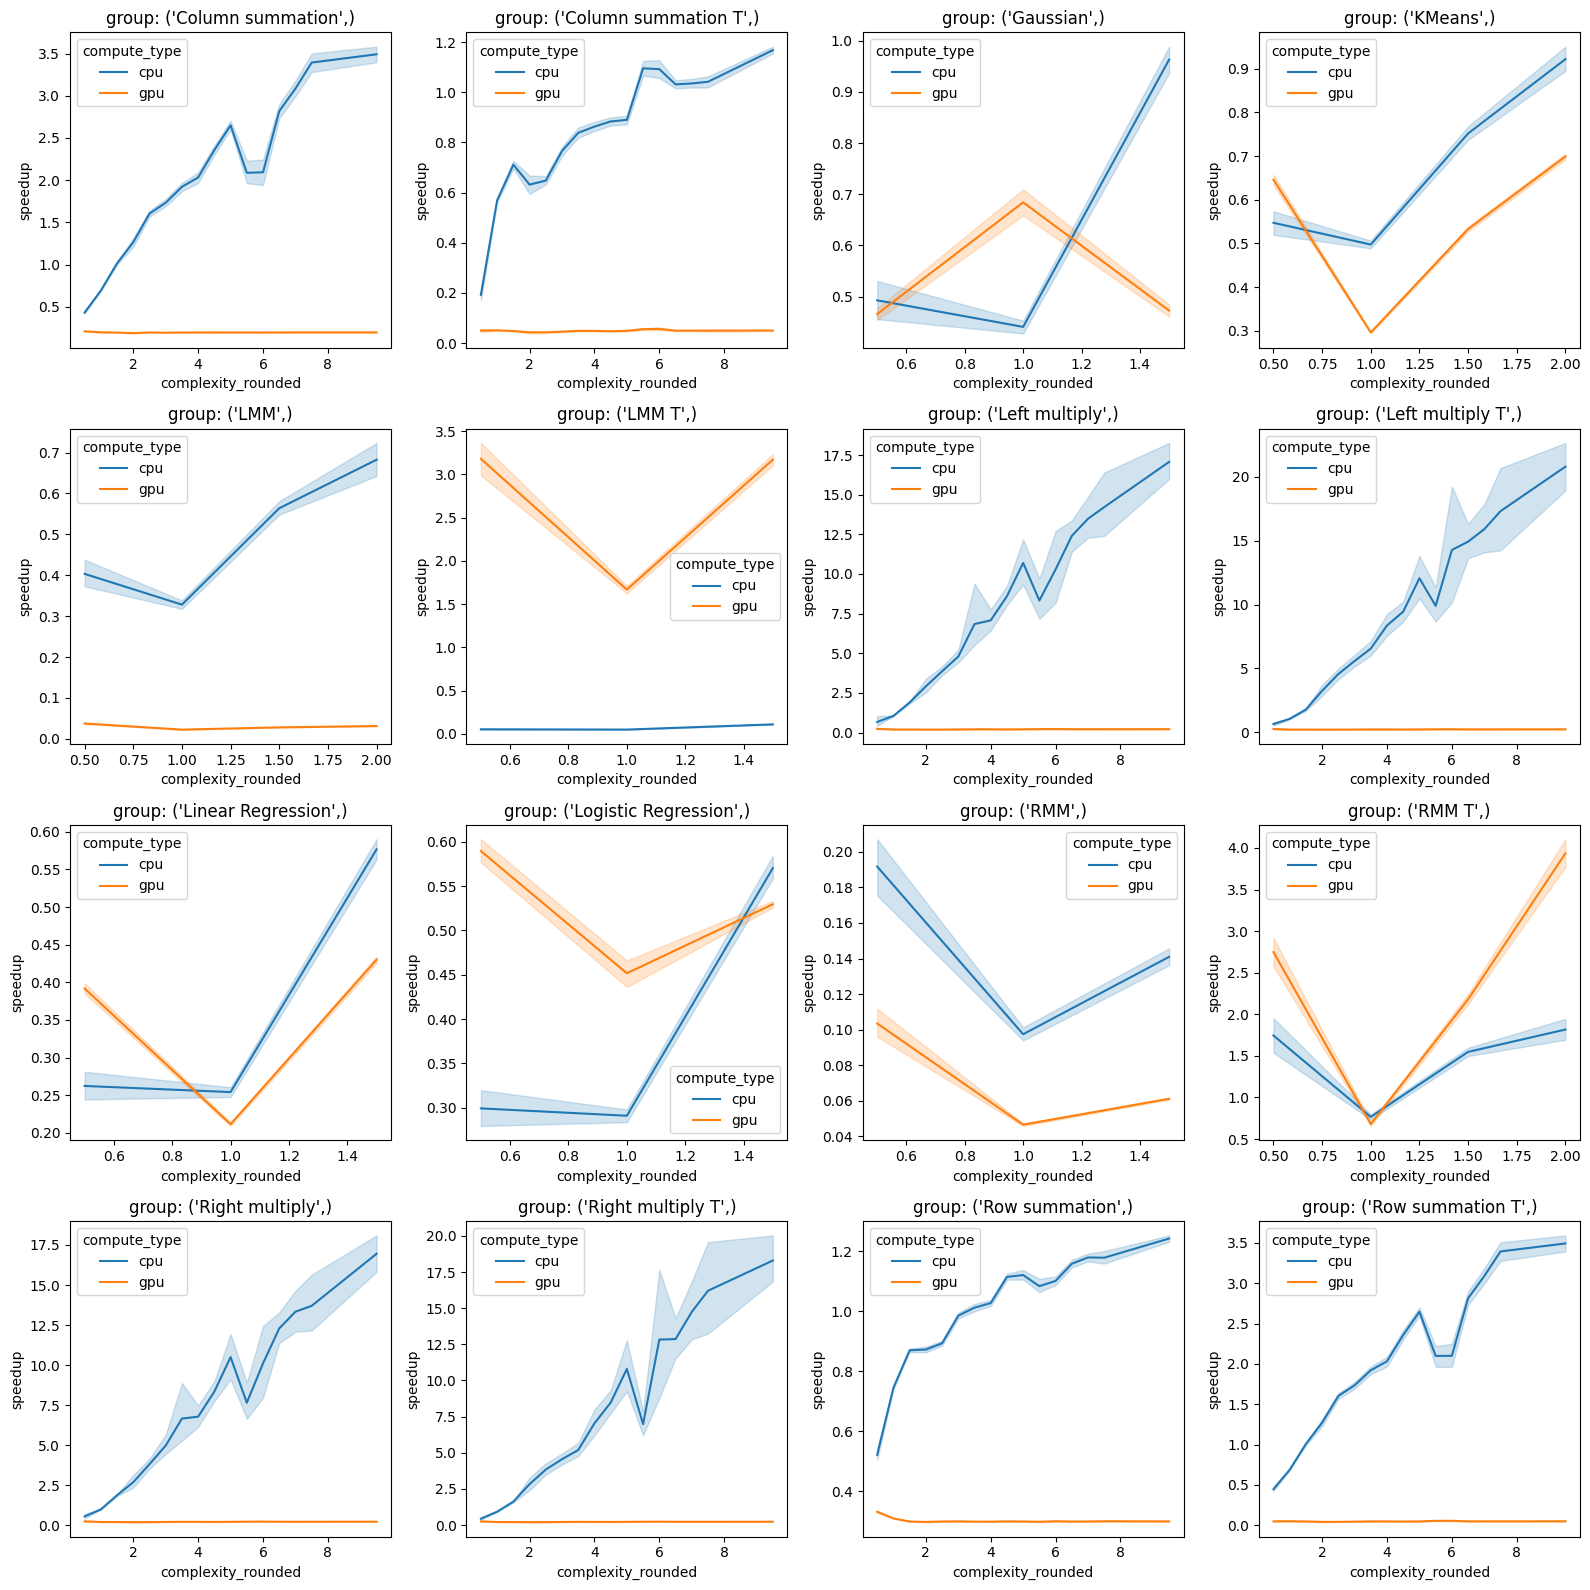

In [ ]:
boxplot_fig = plot_vs_speedup( sns.boxplot, runtime_df, 'complexity_rounded', hue='compute_type', round_x=False)
lineplot_fig = plot_vs_speedup(sns.lineplot,runtime_df, 'complexity_rounded',  hue='compute_type', round_x=False)


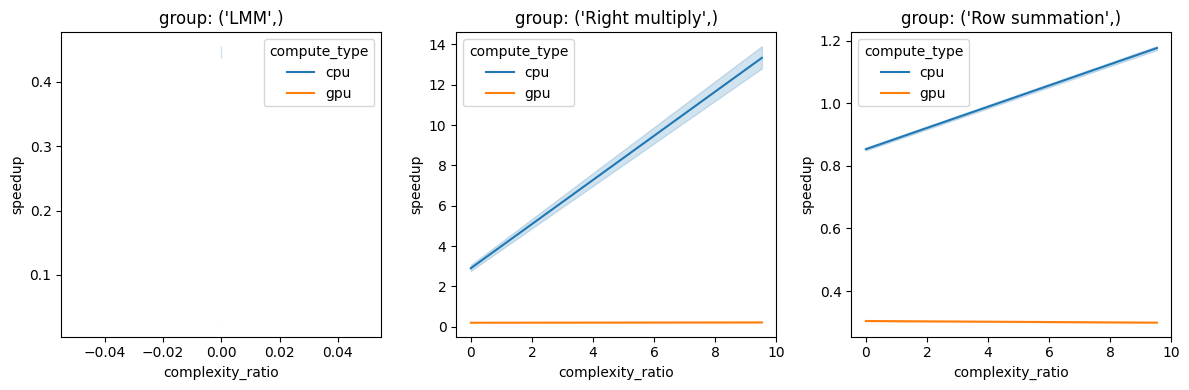

In [ ]:
lineplot_fig = plot_vs_speedup(sns.lineplot, runtime_df[runtime_df.operator.isin(['Row summation', 'LMM', 'Right multiply'])], x='complexity_ratio', hue='compute_type', rows=1, cols=3)

In [ ]:
def add_dashed_line(ax, orientation, value=1.0):
    if orientation == 'horizontal':
        if ax.get_ylim()[0] <= value <= ax.get_ylim()[1]:
            ax.axhline(value, color='red', linestyle='dotted')
            yticks = ax.get_yticks().tolist()
            if value not in yticks:
                ...
                # yticks.append(value)
                # ax.set_yticks(yticks)
                # idx=-1
            else:
                idx = yticks.index(value)
                ax.get_yticklabels()[idx].set_color('red')
    elif orientation == 'vertical':
        if ax.get_xlim()[0] <= value <= ax.get_xlim()[1]:
            ax.axvline(value, color='red', linestyle='dotted')
            xticks = ax.get_xticks().tolist()
            if value not in xticks:
                ...
                # xticks.append(value)
                # ax.set_xticks(xticks)
                # idx = -1
            else:
                idx = xticks.index(value)
                ax.get_xticklabels()[idx].set_color('red')
    else:
        raise ValueError("Invalid orientation. Choose either 'horizontal' or 'vertical'.")


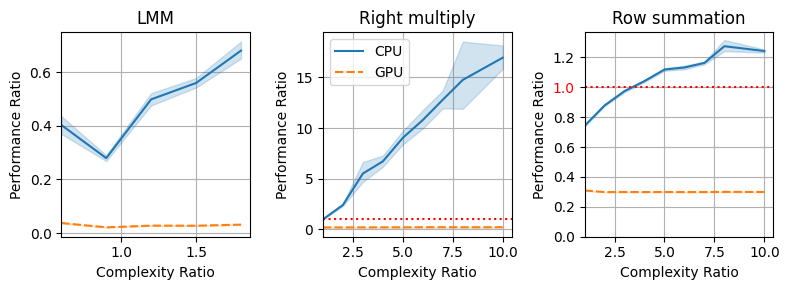

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(FIGURE_WIDTH_INCHES, 3))



for ax, round_res, (group, df) in zip(axs, [0.3, 1., 1.], runtime_df[runtime_df.operator.isin(['Row summation', 'LMM', 'Right multiply'])].groupby('operator')):
    df = df.copy()
    df.compute_type = df.compute_type.str.upper()
    
    df['complexity_rounded'] = df.complexity_ratio.apply(lambda x: round_partial(x, round_res))
    sns.lineplot(data=df, x='complexity_rounded', y='speedup', hue='compute_type', ax=ax, style='compute_type')
    
    ax.set_title(group)
    ax.grid()
    ax.set_ylabel("Performance Ratio")
    ax.set_xlabel("Complexity Ratio")
    
    ax.set_xlim(left=df.complexity_rounded.min())
    ax.set_axisbelow(True)
    if ax.get_ylim()[0] > 0.:
        ax.set_ylim(bottom=0.0)
    ax.get_legend().remove()
    if group == 'Right multiply':
        ax.legend()
    add_dashed_line(ax, 'horizontal')

    
fig.tight_layout()
if SAVE or False:
    fig.savefig(f"{LATEX_PROJECT_BASE_PATH}/chapters/05_cost_estimation/figures/motivation_speedup_complexity_ratio.pdf", bbox_inches='tight')

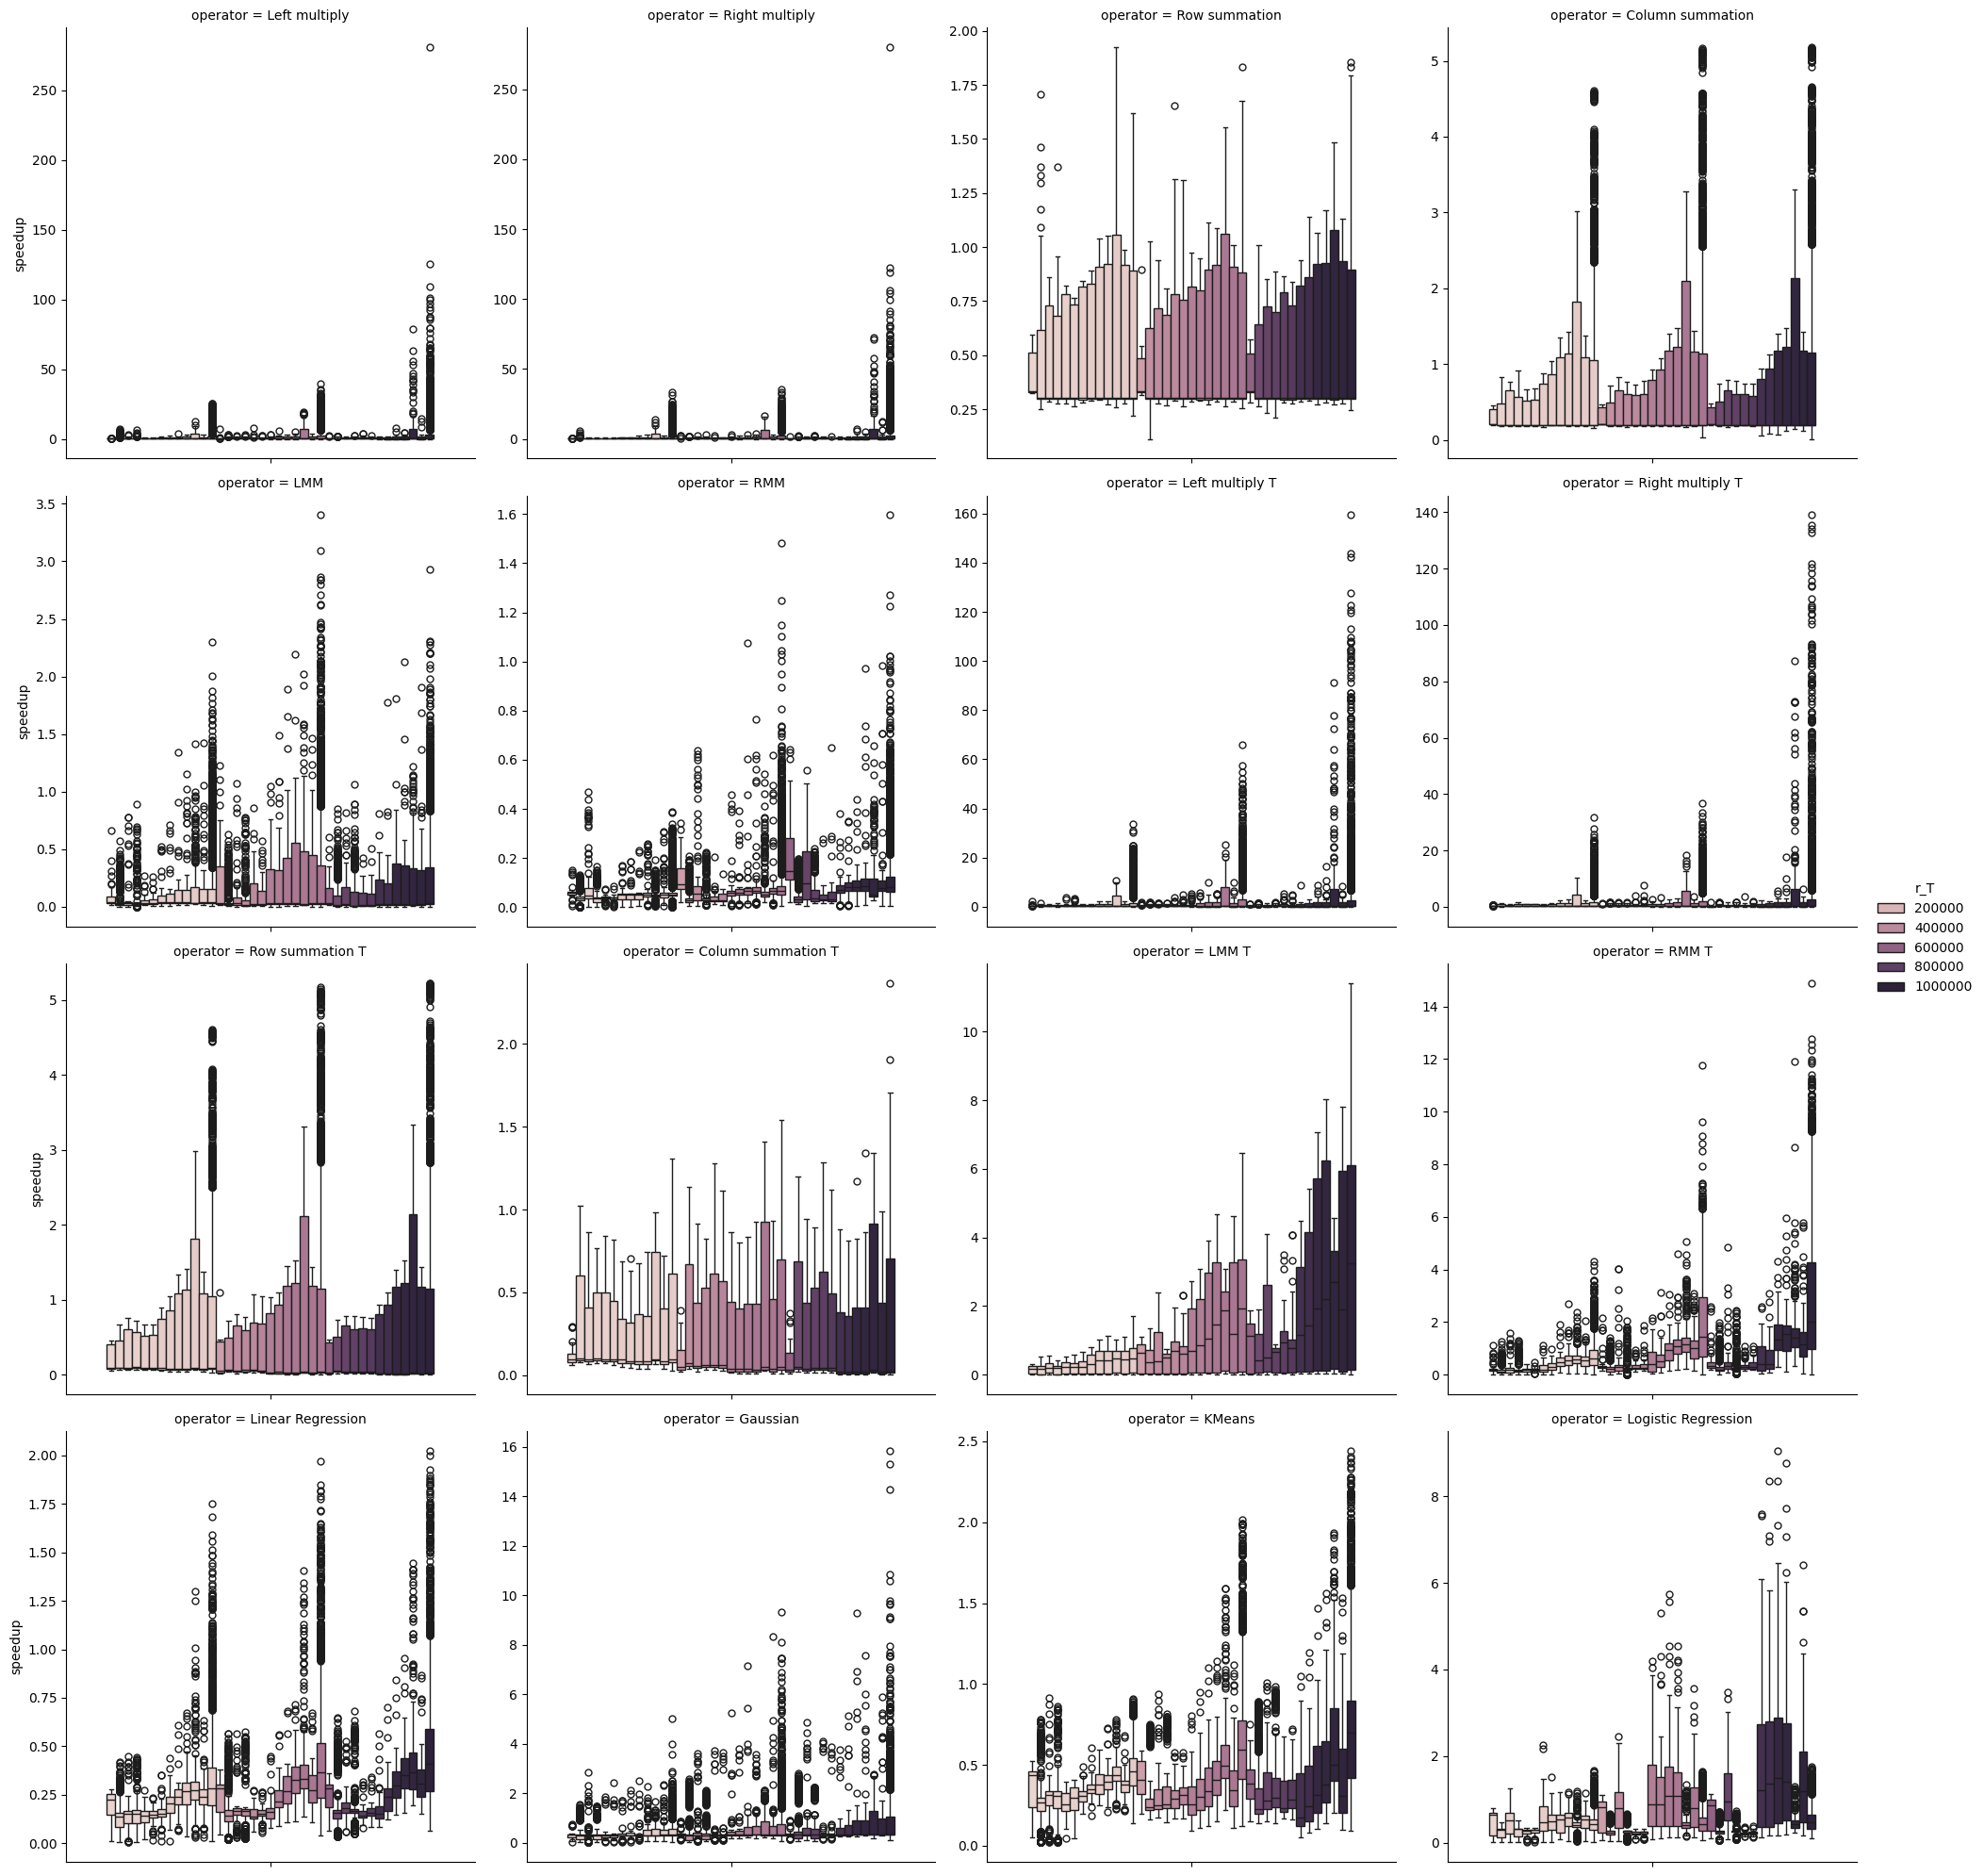

In [ ]:
sns.catplot(data=runtime_df, y='speedup', hue='r_T', col='operator', kind='box', sharey=False, col_wrap=4)